#### Bayes Theorem:

    Bayes theorem works on bayesian probability approach with maximum a posteriori framework.Bayes theorem works with conditional probabilities.
        P(A | B) = P(B | A) . P(A) / P(B)
        P(A | B) - Posterior probability
        P(B | A) - Likelihood
        P(A) - Prior probability (also marginal probability)
        P(B) - Evidence / Marginal Probability - sum rule 
        (In case of independent assumption, the marginal probability of a random variable irrespective of all other variables = probability of only that particular random variable)
        We can calculate P(B) without the assumption P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)
        
        -----------------------------------------------------------------------------------------------
        Sensitivity : True positive rate - probability of event A being true given B is true (Imagine the confusion matrix)
                        eg: A patient will have cancer, but the test will not detect it. This capability of the test to detect cancer is referred to as the sensitivity.
                        
         -----------------------------------------------------------------------------------------------               
         Specificity : True negative rate - probability of event B being false given event is false
                        eg: Testing negative test result (Test=Negative) when the patient does not have cancer (Cancer=False)
         
                
         -----------------
         Confusion matrix:
         ------------------
         -------------------------------------------------------------
                            | Positive Class      | Negative Class
        --------------------------------------------------------------
        Positive Prediction | True Positive (TP)  | False Positive (FP)
        Negative Prediction | False Negative (FN) | True Negative (TN)
        
        TPR + FNR = 1.0     => (FNR = 1.0 – TPR or TPR = 1.0 – FNR)
        TNR + FPR = 1.0     => (TNR = 1.0 – FPR or FPR = 1.0 – TNR)
         
         We can map these rates onto familiar terms from Bayes Theorem:

                P(B|A): True Positive Rate (TPR).
                P(not B|not A): True Negative Rate (TNR).
                P(B|not A): False Positive Rate (FPR).
                P(not B|A): False Negative Rate (FNR).
                
         We can also map the classes and the prediction on familiar terms from Bayes Theorem:

                P(A): Probability of a Positive Class 
                P(not A): Probability of a Negative Class
                P(B): Probability of a Positive Prediction 
                P(not B): Probability of a Negative Prediction
                
         Note: It turns out that sometimes, the posterior probability that we are calculating with the Bayes theorem is equivalent to the precision, also called the Positive Predictive Value (PPV) of the confusion matrix:

                            PPV = TP / (TP + FP)
         --------------------------------------------------------------------------------
         
          ---- So why do we go to all of the trouble of calculating the posterior probability?

            For eg in case of identifying the cancer being positive or negative, we don’t have the confusion matrix for a population of people both with and without cancer that have been tested and have been not tested. Instead, all we have is some priors and probabilities about our population and our test.
            We cannot perform the calculation by counting all the existing examples in the real world.

In [129]:
#Vanilla Bayes theorem - without any python libraries
#Manual calculation using bayes theorem for detect malignant tumor in patients

def bayestheorem(p_b_given_a, p_a, p_b_given_not_a):
    #calculate p_not_a
    p_not_a = 1 - p_a
    
    #calculate p_b
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    p_a_given_b = p_b_given_a * p_a / p_b
    
    return p_a_given_b

p_a = 0.0002
p_b_given_a = 0.85
p_b_given_not_a = 0.05
p_a_given_b = bayestheorem(p_b_given_a, p_a, p_b_given_not_a)
print("Probability of having malignant tumor given the test is positive using Bayes thorem is: %.4s%%"%(p_a_given_b*100))

Probability of having malignant tumor given the test is positive using Bayes thorem is: 0.33%


#### Bayes theorem in modeling hypothesis:
    Bayes Theorem is a useful tool in applied machine learning. It provides a way of thinking about the relationship between data and a model.

    "A machine learning algorithm or model is a specific way of thinking about the structured relationships in the data. In this way, a model can be thought of as a hypothesis about the relationships in the data, such as the relationship between input (X) and output (y). The practice of applied machine learning is the testing and analysis of different hypotheses (models) on a given dataset."

    Bayes Theorem provides a probabilistic model to describe the relationship between data (D) and a hypothesis (h); for example:

                            P(h|D) = P(D|h) * P(h) / P(D)

    Breaking this down, it says that the probability of a given hypothesis holding or being true given some observed data can be calculated as the probability of observing the data given the hypothesis multiplied by the probability of the hypothesis being true regardless of the data, divided by the probability of observing the data regardless of the hypothesis.

    Bayes theorem provides a way to calculate the probability of a hypothesis based on its prior probability, the probabilities of observing various data given the hypothesis, and the observed data itself.

        P(h|D): Posterior probability of the hypothesis (the thing we want to calculate).
        P(h): Prior probability of the hypothesis.
        This gives a useful framework for thinking about and modeling a machine learning problem.

    Note: If we have some prior domain knowledge about the hypothesis, this is captured in the prior probability. If we don’t, then all hypotheses may have the same prior probability.

    If the probability of observing the data P(D) increases, then the probability of the hypothesis holding given the data P(h|D) decreases. Conversely, if the probability of the hypothesis P(h) and the probability of observing the data given hypothesis P(D|h) increases, the probability of the hypothesis holding given the data P(h|D) increases.

    The notion of testing different models on a dataset in applied machine learning can be thought of as "estimating the probability of each hypothesis (h1, h2, h3, … in H) being true given the observed data".The optimization or seeking the hypothesis with the maximum posterior probability in modeling is called maximum a posteriori or MAP for short.

    Any such maximally probable hypothesis is called a maximum a posteriori (MAP) hypothesis. We can determine the MAP hypotheses by using Bayes theorem to calculate the posterior probability of each candidate hypothesis.

    Under this framework, "the probability of the data (D) is constant" as it is used in the assessment of each hypothesis. Therefore, it can be removed from the calculation to give the simplified unnormalized estimate as follows:

                            max h in H P(h|D) = P(D|h) * P(h)
    
    If we do not have any prior information about the hypothesis being tested, they can be assigned a uniform probability, and this term too will be a constant and can be removed from the calculation to give the following: (for eg in clustering, we dont have the class labels)

                                max h in H P(h|D) = P(D|h)
    That is, the goal is to locate a hypothesis that best explains the observed data.

    Fitting models like linear regression for predicting a numerical value, and logistic regression for binary classification can be framed and solved under the MAP probabilistic framework. This provides an alternative to the more common maximum likelihood estimation (MLE) framework.

#### Bayes theorem for classification
    Classification is a predictive modeling problem that involves assigning a label to a given input data sample.

    The problem of classification predictive modeling can be framed as calculating the conditional probability of a class label given a data sample, for example:

                    P(class|data) = (P(data|class) * P(class)) / P(data)
        
        Where P(class|data) is the probability of class given the provided data.

        This calculation can be performed for each class in the problem and the class that is assigned the largest probability can be selected and assigned to the input data.
        
        Note: The priors P(class), P(data) are easy to estimate from a training dataset, if the dataset is suitability representative of the broader problem. The conditional probability P(data|class) is not feasible unless the number of examples is extraordinarily large enough to effectively estimate the probability distribution for all different possible combinations of values. This is almost never the case, we will not have sufficient coverage of the domain. As such, the direct application of Bayes Theorem  using joint probability to calculate conditional probability becomes intractable, especially as the number of variables or features (n) increases.
        
        Solution : Naive Bayes classifier to simplify the calculation by making naive assumption
        
        Info: The observation or input to the model is referred to as X and the class label or output of the model is referred to as y. Together, X and y represent observations collected from the domain, i.e. a table or matrix (columns and rows or features and samples) of training data used to fit a model. The model must learn(f) how to map specific examples to class labels or y = f(X) that minimized the error of misclassification. A classification problem may have k class labels y1, y2, …, yk and n input variables, X1, X2, …, Xn. We can calculate the conditional probability for a class label with a given instance or set of input values for each column x1, x2, …, xn as P(yi | x1, x2, …, xn)
    
    We can frame classification as a conditional classification problem with Bayes Theorem as follows:

            P(yi | x1, x2, …, xn) = P(x1, x2, …, xn | yi) * P(yi) / P(x1, x2, …, xn)
        
#### Naive Bayes Classifier:
    Bayes Theorem assumes that each input variable is dependent upon all other variables. This is a cause of complexity in the calculation. We can remove this assumption and consider each input variable as being independent from each other. This changes the model from a dependent conditional probability model to an independent conditional probability model and dramatically simplifies the calculation.

    This means that we calculate P(data|class) for each input variable separately and multiple the results together, for example:
            P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class) / P(data)
    
    We can also drop the probability of observing the data as it is a constant for all calculations
            
            P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class)
            
    The conditional probability for a feature value given the class label P(x1, x2, …, xn | yi) can be estimated from the data. Specifically, those data examples that belong to a given class, and one data distribution per variable. A different approach is required depending on the data type of each feature. Specifically, the data is used to estimate the parameters of one of three standard probability distributions. In the case of categorical variables, such as counts or labels, a multinomial distribution can be used. If the variables are binary, such as yes/no or true/false, a binomial distribution can be used. If a variable is numerical, such as a measurement, often a Gaussian distribution is used.

            These three distributions are so common that the Naive Bayes implementation is often named after the distribution. For example: 
            Binomial Naive Bayes: Naive Bayes that uses a binomial distribution.
            Multinomial Naive Bayes: Naive Bayes that uses a multinomial distribution.
            Gaussian Naive Bayes: Naive Bayes that uses a Gaussian distribution.
            
            Note: A dataset with mixed data types for the input variables may require the selection of different types of data distributions for each variable. Using one of the above three common distributions is not mandatory; for eg, if a real-valued variable is known to have a different specific distribution, such as exponential, then that specific distribution may be used instead. If a real-valued variable does not have a well-defined distribution or complex distribution, such as bimodal or multimodal, then a "kernel density estimator" can be used to estimate the probability distribution instead. The calculation of the independent conditional probability for one example for one class label involves multiplying many probabilities together, one for the class and one for each input variable. As such, the multiplication of many small numbers together can become numerically unstable, especially as the number of input variables increases. To overcome this problem, it is common to "change the calculation from the product of probabilities to the sum of log probabilities". This is often called the "log-trick" when multiplying probabilities. Also the prepared conditional probability distributions can be randomly sampled in order to create new plausible data instances i.e  as a generative models. 
            
            The Naive Bayes algorithm has proven effective and therefore is popular for text classification tasks. The words in a document may be encoded as binary (word present), count (word occurrence), or frequency (tf/idf) input vectors and binary, multinomial, or Gaussian probability distributions used respectively.

In [131]:
#Naive Bayes Classifier - Vanilla and also using libraries

#Prediction of the class label using NB

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from scipy.stats import norm
import numpy as np


#Calculating the conditional probability of each input variable.
#This means we need one distribution for each of the input variables
#and one set of distributions for each of the class labels, or four distributions in total.
#fit a probability distribution for a univariate sample
def fit_distribution(data):
    mu = np.mean(data)
    sigma = np.std(data)
    print(f"Mean: {mu:.2f}, Std: {sigma:.2f}")
    dist = norm(mu, sigma)
    return dist

#creating 2d classification dataset with 2 classes
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
print(f"Input Shape: X -  {X.shape}")
print(f"Class labels Shape: Y - {y.shape}")
print(f"Input: \n {X[:5]}")
print(f"Class labels: \n {y[:5]}")
print(f"Class proportions: {len(X[y==0]), len(X[y==1])}")

print(f"\nObseravation: \n The distribution from the input variables"
     f"\n can be seen as guassian as they have numerical float values."
     f"\n Hence we model using Gaussian NB")

#splitting the data w.r.to classes for each variable to fit the distribution
Xy0 = X[y==0] #seperating the instances of class 0 and class 1
Xy1 = X[y==1]
#getting the inputs that corresponds to each class that helps to calculate P(x1|y=0) , P(x2|y=0), P(x1|y=1) , P(x2|y=1)
Xy0_x1 = Xy0[:, 0] #getting the x1 variable data from the data with class 0 = 0th column for class 0
Xy0_x2 = Xy0[:, 1] #1st column
Xy1_x1 = Xy1[:, 0]
Xy1_x2 = Xy1[:, 1]

#fitting the distributions of the splitted data to create pdf's
dist_x1_y_0 = fit_distribution(Xy0_x1)
dist_x2_y_0 = fit_distribution(Xy0_x2)
dist_x1_y_1 = fit_distribution(Xy1_x1)
dist_x2_y_1 = fit_distribution(Xy1_x2)

#calculating priors
p_y_0 = len(Xy0)/ len(X)
p_y_1 = len(Xy1) / len(X)
print("Priors: {}, {}".format(p_y_0, p_y_1))

#calculting the posterior probability
def posterior(X, prior, dist1, dist2):
    posterior = prior * dist1.pdf(X[0]) * dist2.pdf(X[1]) #prior * p(x1|class) * p(x2|class)
    return posterior

#classify a sample
Xsample, ysample = X[0], y[0] #X[0] = x1,x2 y[0]=class 0 0r 1 
prob_class_0 = posterior(Xsample, p_y_0, dist_x1_y_0, dist_x2_y_0)
prob_class_1 = posterior(Xsample, p_y_1, dist_x1_y_1, dist_x2_y_1)
print("P(y=0 | %s) = %.3f" % (Xsample, prob_class_0*100))
print("P(y=1 | %s) = %.3f" % (Xsample, prob_class_1*100))
print("True class : y=%d" % ysample)
print("Predicted class: y'=%.1f" % np.argmax([prob_class_0*100, prob_class_1*100]))


print("GaussianNB - Using scikit library")
model = GaussianNB().fit(X, y)
print("predict probabilities: {}".format(model.predict_proba([Xsample])))
print("prediction: {}".format(model.predict([Xsample])))


Input Shape: X -  (100, 2)
Class labels Shape: Y - (100,)
Input: 
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
Class labels: 
 [1 1 0 0 1]
Class proportions: (50, 50)

Obseravation: 
 The distribution from the input variables
 can be seen as guassian as they have numerical float values.
 Hence we model using Gaussian NB
Mean: 0.95, Std: 1.04
Mean: 4.35, Std: 0.96
Mean: 2.04, Std: 0.98
Mean: 1.10, Std: 1.02
Priors: 0.5, 0.5
P(y=0 | [4.21850347 2.23419161]) = 0.005
P(y=1 | [4.21850347 2.23419161]) = 0.354
True class : y=1
Predicted class: y'=1.0
GaussianNB - Using scikit library
predict probabilities: [[0.01435623 0.98564377]]
prediction: [1]


#### Bayesian Optimization
    Developing classifier models may be the most common application on Bayes Theorem in machine learning. Nevertheless, there are many other applications. Two important examples are optimization and causal models.
    Global optimization is a challenging problem of finding an input that results in the minimum or maximum cost of a given objective function.
    
    What exactly is global optimization?
        Global function optimization, or function optimization for short, involves finding the minimum or maximum of an objective function.
        
    Some more terms to be known
        
    Samples:
    ----------
    One example from the domain, represented as a vector. Samples comprised of one or more variables generally easy to devise or create. One sample is often defined as a vector of variables with a predefined range in an n-dimensional space. This space must be sampled and explored in order to find the specific combination of variable values that result in the best cost.
    
    Search Space:
    -------------
    Extent of the domain from which samples can be drawn.
    
    
    True/Target function:
    ---------------------
    Function where the samples are drawn from.This is always unknown and this is what we are always trying to approximate/estimate
    
    Cost/Loss:
    -----------
    Numeric score for a sample calculated via the objective function.
    
    Difference between cost function/ loss function/ objective function:
    -------------------------------------------------------------------
    The loss function was defined w.r.to a single training example, which measures how well you're doing on a single training example. It is usually a function defined on a data point, prediction and label, and measures the penalty in prediction error.
    
    Eg: square loss l(f(xi|θ), yi)=(f(xi|θ)−yi)^2 , used in linear regression
        hinge loss l(f(xi|θ), yi)=max(0, 1−f(xi|θ)yi), used in SVM
        0/1 loss l(f(xi|θ), yi)=1⟺f(xi|θ)≠yi, used in theoretical analysis and definition of accuracy
    
    The cost function is almost same thing,but it measures how well you're doing an entire training set. It might be a sum of loss functions over your training set plus some model complexity penalty (regularization).
    
    Eg: Mean Squared Error MSE(θ)=1/N ∑ (f(xi|θ)−yi)^2 (where i tends from 1 to N)
        SVM cost function SVM(θ)=∥θ∥^2 + C ∑ξi (where i tends from 1 to N)
        (there are additional constraints connecting ξi with C and with training set)
    
    Objective function is the function which we define initially and which we are going to optimize it by maximizing or minimizing. It is the most general term for any function that you optimize during training. 
    For eg, a probability of generating training set in maximum likelihood approach is a well defined objective function, but it is not a loss function nor cost function (however you could define an equivalent cost function).
        Eg: MLE is a type of objective function (which you maximize)
            Divergence between classes can be an objective function but it is barely a cost function, unless you define something artificial, like 1-Divergence, and name it a cost
            
     Note: h is the model (h for hypothesis). The objective is that h performs well. The objective function measures how well h does and it is usually different from h
    
    The more general scenario is to define an objective function(objective) first that we want to optimize. This objective function could be to:
       - maximize the posterior probabilities (e.g., naive Bayes - P(θ| D))
       - maximize log-likelihood P(D | θ) or minimize cross-entropy loss (or cost) function, minimize hinge loss (support vector machine)
       - maximize a fitness function (genetic programming)
       - maximize the total reward/value function (reinforcement learning)
       - maximize information gain/minimize child node impurities (CART decision tree classification)
       - minimize a mean squared error cost (or loss) function (CART, decision tree regression, linear regression, adaptive linear neurons, …
        
       
    MLE and MAP: 
    ------------
    Maximum likelihood estimation is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing a likelihood function P(D|θ) or P(D|h) or P(D|class) so that, under the assumed statistical model, the observed data is most probable. Simply, we are maximizing the likelihood of assumed distribution/assumed parameters/assumed model/assumed class.
    
    In Bayesian statistics, a maximum a posteriori probability estimate is an estimate of an "unknown quantity (θ or h or class)" P(θ|D), that equals the mode of the posterior distribution. The MAP can be used to obtain a point estimate of an unobserved quantity on the basis of empirical data. MAP estimate will use more information than MLE does; specifically, the MAP estimate will consider both the likelihood - as described above - and prior knowledge of the system's state. MAP estimation can therefore be seen as a regularization of maximum likelihood estimation.
    
    MLE gives you the value which maximises the Likelihood P(D|θ). And MAP gives you the value which maximises the posterior probability P(θ|D)
    
    Optimization and Objective function:
    ------------------------------------
    Optimization is often described in terms of minimizing cost, as a maximization problem can easily be transformed into a minimization problem by inverting the calculated cost. Together, the minimum and maximum of a function are referred to as the extreme of the function (or the plural extrema).

    The objective function is often easy to specify but can be computationally challenging to calculate or result in a noisy calculation of cost over time. The form of the objective function is unknown and is often highly nonlinear, and highly multi-dimensional defined by the number of input variables. The function is also probably non-convex. This means that local extrema may or may not be the global extrema (e.g. could be misleading and result in premature convergence), hence the name of the task as global rather than local optimization.

    Although little is known about the objective function, it is often referred to as a black box function and the search process as "Black Box Optimization". Further, the objective function is sometimes called an "Oracle" given the ability to only give answers.

    Function optimization is a fundamental part of machine learning. Most machine learning algorithms involve the "optimization of parameters" (weights, coefficients, etc.) in response to training data. Optimization "also refers to the process of finding the best set of hyperparameters" that configure the training of a machine learning algorithm. Taking one step higher again, "the selection of training data, data preparation, and machine learning algorithms themselves is also a problem of function optimization".

    Summary of optimization in machine learning:
            - Finding the minimum(cost) of the objective function
            - Algorithm Training. Optimization of model parameters.
            - Algorithm Tuning. Optimization of model hyperparameters.(in 4 ways - manual search, random search, grid search, bayesian optimization)
            - Predictive Modeling. Optimization of data, data preparation, and algorithm selection.
    
    Many methods exist for function optimization, such as randomly sampling the variable search space, called random search, or systematically evaluating samples in a grid across the search space, called grid search. More principled methods are able to learn from sampling the space so that future samples are directed toward the parts of the search space that are most likely to contain the extrema.

    "A directed approach to global optimization that uses probability is called Bayesian Optimization."
    
        
    Working of Bayesian Optimization:
    ---------------------------------
    
       Bayesian Optimization(also called Sequential Model-Based Optimization) provides a principled technique based on Bayes Theorem to direct a search of a global optimization problem that is efficient and effective. It works by building a probabilistic model of the objective function, called the surrogate function, that is then searched efficiently with an acquisition function before candidate samples are chosen for evaluation on the real objective function.
        Bayesian optimization is a powerful strategy for finding the extrema of objective functions that are expensive to evaluate. It is particularly useful when these evaluations are costly, when one does not have access to derivatives, or when the problem at hand is non-convex.
        
        
    Bayesian optimization for hyperparameter tuning:
    ------------------------------------------------
      Bayesian Optimization is often used in applied machine learning to tune the hyperparameters of a given well-performing model on a validation dataset. It differs from Random Search and Grid Search in that it improves the search speed using "past performances", whereas the other two methods are uniform (or independent) of past evaluations. In that sense, Bayesian Optimization is like Manual Search. Let’s say you are manually optimizing the hyperparameter of a Random Forest regression model. Firstly, you would try a set of parameters, then look at the result, change one of the parameters, rerun, and compare the results, so that way you know whether you are going towards the right direction. Bayesian Optimization does a similar thing — the performance of your past hyperparameter affects the future (next)hyper parameter decision. In comparison, Random Search and Grid Search do not take into account past performance when determining new hyperparameters to evaluate.
      
      Let’s take an example of optimizing hyperparameters for a Random Forest regression model. Say we want to find a set of hyperparameters that will minimize RMSE. Here, the function to compute RMSE is called the true objective function. If we were to know the probability distribution of our objective function, (in simple words, if we were to know the shape of the objective function i.e shape of rmse scores vs hyperparameters), then we can simply compute the gradient descent and find the global minimum. However since we don’t know the distributions of RMSE score (this is actually what we are trying to find out), we need Bayesian Optimization to help us decipher this black-box model. 
      
      Bayesian Optimization builds a probability model of the objective function called "Surrogate function" (also called response surface model) to approximate the true objective function and uses it to select hyperparameter to evaluate in the true objective function. A surrogate model by definition is “the probability representation of the objective function”, which is essentially a model trained on the (hyperparameter, true objective function score) pairs. In math, it is P(objective function score | hyperparameter). Probabilistically, Surrogate function summarizes the conditional probability of an objective function (f), given the available data (D) or P(f|D).
      
      Another function in Bayesian optimization is "Acquisition fucntion" also called selection function. It is used to choose or select the next hyperparameter to be tested on objective function in order to check its performance on objective function. Lets say we have 10 samples of hyperparameters and true objective function score pairs which we used to build to surrogate model.How can we choose/test the next parameter i.e 11th hyerparamter? We need to build an acquisition function (also called the selection function). The next hyperparameter of choice is where the acquisition function is maximized.
      
     - First, initiate a surrogate model and an acquisition function.
     Common acquisition functions : Expected Improvement,Probability of Improvement, Lower Confidence Bound
     Surrogate function: Guassian Process Model, TPE(Tree Parzen Estimators)
     - Then for each iteration, find the hyperparameter x* where the acquisition function is maximized. 
      Note: The acquisition function is a function of the surrogate model, meaning that it is built using the surrogate model instead of the true objective function
     - Obtain the true objective function score of x* to see how this point actually performs
     - Include the pair (hyperparameter x*, true objective function score) in the history of other samples which we used to train surrogate model with.
     - Train the surrogate model using the latest history of samples
     - Repeat until the max number of iterations is reached. 
     You now (hopefully) have an accurate approximation of the true objective function and can easily find the global minimum from the past evaluated samples.
     - In the end, the history of (hyperparameter, true objective function score) pairs are returned. Note that the last record is not necessarily the best-achieved score. You would have to sort the score to find the best hyperparameter.
      
        This is how we can choose best hyperparameters from the Bayesian optimization.

(100,)
[0.62862626 0.8370482  0.78339078 0.67503968 0.58980575]
Shapes:X - (100, 1) Y: (100, 1)


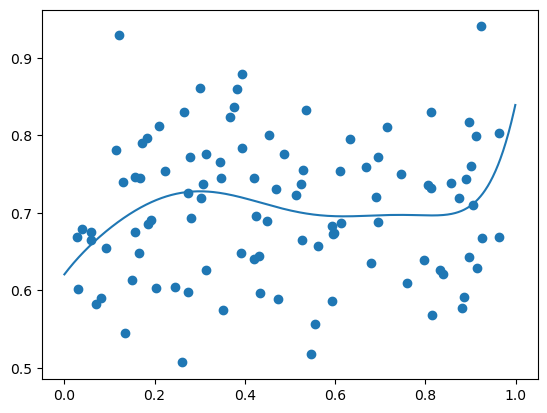

>-- x=0.978, f()=0.790818, actual=-0.089
>-- x=0.867, f()=0.739811, actual=0.312
>-- x=0.419, f()=0.722486, actual=0.022
>-- x=0.203, f()=0.719811, actual=-0.102
>-- x=0.853, f()=0.715355, actual=-0.130
>-- x=0.508, f()=0.704184, actual=0.266
>-- x=0.235, f()=0.688035, actual=-0.020
>-- x=0.496, f()=0.692128, actual=0.155
>-- x=0.837, f()=0.674491, actual=-0.085
>-- x=0.522, f()=0.674800, actual=0.336
>-- x=0.006, f()=0.679005, actual=-0.116
>-- x=0.131, f()=0.706868, actual=-0.090
>-- x=0.472, f()=0.673172, actual=0.331
>-- x=0.470, f()=0.660214, actual=0.127
>-- x=0.693, f()=0.633165, actual=0.495
>-- x=0.156, f()=0.661360, actual=-0.137
>-- x=0.811, f()=0.643051, actual=-0.085
>-- x=0.463, f()=0.649887, actual=-0.028
>-- x=0.187, f()=0.631509, actual=0.108
>-- x=0.463, f()=0.629853, actual=-0.081
>-- x=0.205, f()=0.615137, actual=0.034
>-- x=0.840, f()=0.613998, actual=-0.127
>-- x=0.186, f()=0.594686, actual=-0.137
>-- x=0.485, f()=0.616552, actual=0.450
>-- x=0.487, f()=0.611052, 

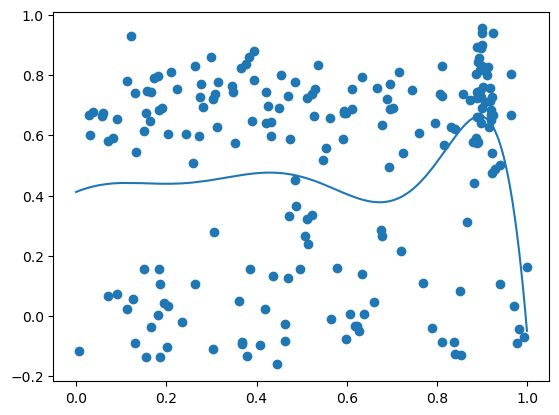

Best Result: x=0.114, y=0.781


In [133]:
#Bayesian Optimization manually - hyper parameter tuning 
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin
from numpy import argmax, argmin, asarray, arange, vstack
from numpy import random
from numpy.random import normal, random
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings, simplefilter

#objective function
def obj_func(X, noise=0.1):
    #we are assuming that we know true obj as multimodal problem with five peaks => x**2 * sin(5 * pi * x)**6.0
    #we augment this objective function by adding Gaussian noise - to represent real world objective func
    #This will mean that the real evaluation will have a positive or negative random value added to it
    #making the function challenging to optimize.
    guas_noise = normal(loc=0, scale=noise)
    return (x**2 * sin(5 * pi * x)**6.0) + guas_noise

#surrogate or approximation for the objective function
def surr_func(X, model):
    #This GP may generate warnings while predicting for certain hyperparameters because of thin distribution at times
    #Hence catch and ignore warnings generated when making a prediction
    with catch_warnings():
        simplefilter('ignore')
        # The GP result for a given sample will be a mean of the distribution at that point.
        #We can also get the standard deviation of the distribution at that point by specifying the argument return_std=True
        return model.predict(X, return_std=True)

#acquisition function - probability of improvement
def acq_func(X, Xsamples, model):
    #Xsamples represent the array of new samples to be used for search space for new parameter
    # calculating the best surrogate score found so far earlier
    yhat, _ = surr_func(X, model)
    best = max(yhat)
    # calculate mean and stdev via surrogate function
    mu, std = surr_func(Xsamples, model)
    mu = mu.reshape(len(mu), 1)
    mu = mu[:, 0]
    #calculate the probability of improvement(PI)
    #Probability of Improvement method, calculated as the normal cumulative probability of the normalized expected improvement
    #PI = cdf((mu – best_mu) / stdev) Where cdf() is the normal cumulative distribution function, 
    #mu is the mean of the surrogate function for a given sample x,
    #stdev is the standard deviation of the surrogate function for a given sample x, 
    #and best_mu is the mean of the surrogate function for the best sample found so far
    #we are adding a very small number to the standard deviation to avoid a divide by zero error.
    probs = norm.cdf((mu - best) / (std+1E-9))
    return probs

#optimizing the acquistion function 
#to select next hyperparmatert - this involves first drawing a random sample of candidate samples from the domain
#evaluating them with the acquisition function
#then maximizing the acquisition function or choosing the candidate sample that gives the best score
def optimize_acquisition(X, y, model):    
    #generating the random samples to search in a random search space
    xsamples = random(100)
    xsamples = xsamples.reshape(len(xsamples), 1)
    #calculate the acquistion function score for each sample
    scores = acq_func(X, xsamples, model)
    #locate the index of the largest score - Probability of Improvement method
    idx = argmax(scores)
    return xsamples[idx, 0]

#plotting the distribution of x and y for surrogate model and the true objective model
def plot(X, y, surr_model):
    plt.scatter(X, y)
    #generating samples for surrogate model
    #these samples x and y represent the  hyperparameters and the respective true objective scores  
    xsamples = asarray(arange(0, 1, 0.001))
    xsamples = xsamples.reshape(len(xsamples), 1)
    ysamples, _ = surr_func(xsamples, surr_model)
    plt.plot(xsamples, ysamples)
    plt.show()

# sample the domain sparsely with noise
#think of these X and y as hyperparameter and true objective score history
X = random(100)
print(X.shape)
y = asarray([obj_func(x) for x in X])
print(y[:5])

#reshaping X and Y into rows and columns
X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
print(f"Shapes:X - {X.shape} Y: {y.shape}")

#defining the model to be used as surrogate
surr_model = GaussianProcessRegressor()
#fit the model with the history
surr_model.fit(X, y)
#plot the actual model versus surrogate
#we'd expect surrogate function to have a crude approximation of the true noisy objective function samples (X, y).
plot(X, y, surr_model)

#perform the optimization - algorithm iterates for 100 cycles
#which performs selecting samples, evaluating them, and adding them to the dataset to update the surrogate function, and over again.
for i in range(100):
    #select the next hyperparameter to sample
    x = optimize_acquisition(X, y, surr_model)
    #sample the new hyperparameter to find the true objective score
    actual_obj_score = obj_func(x)
    #get the esitmated score with surroagte model and summarize the finding
    est_surr_score, _ = surr_func([[x]], surr_model)
    print('>-- x=%.3f, f()=%3f, actual=%.3f' % (x, est_surr_score, actual_obj_score))
    #add the data to the dataset
    X = vstack((X, [[x]]))
    y = vstack((y, [[actual_obj_score]]))
    #update the surrogate model
    surr_model.fit(X, y)
    
# plot all samples and the final surrogate function
plot(X, y, surr_model)
#best result
best_result = argmax(y)
print('Best Result: x=%.3f, y=%.3f' % (X[ix], y[ix]))



#### Observation:
    The plot resembles a crude version of the underlying non-noisy objective function(plot in the next cell),
    importantly with a peak around 0.9 where we know the true maxima is located(can be seen in the next cell).
    Ideally, these scores would get closer and closer as the algorithm converges on one area of the search space.
    We would expect an overabundance of sampling around the known optima, and this is what we see, with may dots around 0.9.
    We also see that the surrogate function has a stronger representation of the underlying target domain.

    ------------------------------------------------------------------------------------------------------------------------
    As we assumed the true objective function, we can report the actual global optimal input and its respective score. Running the below code first reports the global optima as an input with the value 0.9 that gives the score 0.81. 


    We can test this function by first defining a grid-based sample of inputs from 0 to 1 with a step size of 0.01 across the domain. We can then evaluate these samples using the target function without any noise to see what the real objective function looks like. We can then evaluate these same points with noise to see what the objective function will look like when we are optimizing it. 
    We can look at all of the non-noisy objective function values to find the input that resulted in the best score and report it. This will be the optima, in this case, maxima, as we are maximizing the output of the objective function. We would not know this in practice, but for out test problem, it is good to know the real best input and output of the function to see if the Bayesian Optimization algorithm can locate it.
    
    Finally, we can create a plot, first showing the noisy evaluation of the samples as a scatter plot with input on the x-axis and score on the y-axis, then a line plot of the scores without any noise that represents the true shape of the objective function (line).

Optima: x=0.900, y=0.810


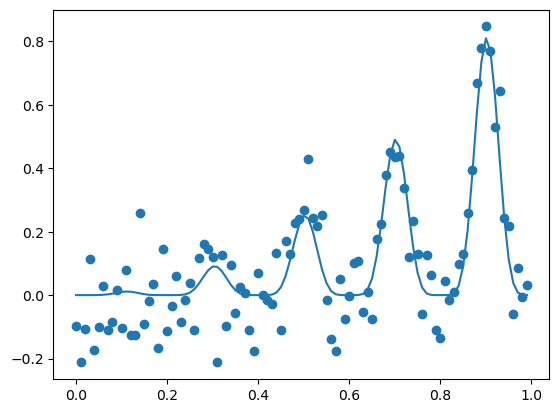

In [114]:
from math import sin
from math import pi
from numpy import arange
from numpy import argmax
from numpy.random import normal
from matplotlib import pyplot
 
# objective function
def objective(x, noise=0.1):
 noise = normal(loc=0, scale=noise)
 return (x**2 * sin(5 * pi * x)**6.0) + noise
 
# grid-based sample of the domain [0,1]
X = arange(0, 1, 0.01)
# sample the domain without noise
y = [objective(x, 0) for x in X]
# sample the domain with noise
ynoise = [objective(x) for x in X]
# find best result
ix = argmax(y)
print('Optima: x=%.3f, y=%.3f' % (X[ix], y[ix]))
# plot the points with noise
pyplot.scatter(X, ynoise)
# plot the points without noise
pyplot.plot(X, y)
# show the plot
pyplot.show()

#Observation: optima has an input of 0.9 and an output of 0.810 if there was no sampling noise. 
#line represents true objective function and dots represent data with noise

In [124]:
!pip install scikit-optimize

     -------------------------------------- 100.3/100.3 kB 1.9 MB/s eta 0:00:00


In [134]:
#Bayesian optimization using scikitlearn
#Scikit-Optimize and HyperOpt are the 2 libraries extensively used to tune the hyperparameters
#Here we use scikit-optimize(direct optimization) for k-nearest neighbors classification to tune hyperparameter k 
#There are two ways that scikit-optimize can be used to optimize the hyperparameters of a scikit-learn algorithm.
#The first is to perform the optimization directly on a search space,
#and the second is to use the BayesSearchCV class, a sibling of the scikit-learn native classes for random and grid searching.

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize
from numpy import mean

#preparing the data
X, y = make_blobs(n_samples=500, centers=3, n_features=2)
#defining the model
model = KNeighborsClassifier()

#Now defining the search space
#we perform search for k that represents no. of nearest neighbors and p which represents the shape of nieghborhood function
#representation requires ranges be defined for a given data type. 
#In this case, they are Integers, defined with the min, max, and the name of the parameter to the scikit-learn model.
search_space = [Integer(1, 5, name=('n_neighbors')),
                Integer(1, 2, name=('p'))]


#Next we define a function that will be used to evaluate a given set of hyperparameters.
#We want to minimize this function, therefore smaller values returned must indicate a better performing model.
#We can use the use_named_args() decorator from the scikit-optimize on the function definition
#This allows the function to be called directly with a specific set of parameters from the search space.
#As such, our custom function will take the hyperparameter values as arguments, which can be provided to the model directly in order to configure it.
#We can define these arguments generically in python using the **params argument to the function, then pass them to the model via the set_params(**params) function.
#this is the objective function which we will minimize                                      
@use_named_args(search_space)
def evaluate_model(**params):
    model.set_params(**params)
    #as we configured the model, we evaluate it using the 5 fold cross validation
    result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
    estimate = mean(result)
    #We can then report the performance of the model as one minus the mean accuracy across these folds.
    #This means that a perfect model with an accuracy of 1.0 will return a value of 0.0 (1.0 – mean accuracy).
    return 1-estimate
    
#performing the optimization using gp_minimize() with the name of the objective function and the defined search space 
#By default, this function will use a ‘gp_hedge‘ acquisition function that tries to figure out the best strategy
#but this can be configured via the acq_func argument.
#The optimization will also run for 100 iterations by default, but this can be controlled via the n_calls argument
#Once run, we can access the best score via the “fun” property and the best set of hyperparameters via the “x” array property.
result = gp_minimize(evaluate_model, search_space)
# summarizing findings
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\

C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\

C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\malla\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Accuracy: 1.000
Best Parameters: n_neighbors=4, p=1


#### Bayesian Belief Networks
    Probabilistic models can define relationships between variables and be used to calculate probabilities.

    Fully conditional models may require an enormous amount of data to cover all possible cases, and probabilities may be intractable to calculate in practice. Simplifying assumptions such as the conditional independence of all random variables can be effective, such as in the case of Naive Bayes, although it is a drastically simplifying step.

    An alternative is to develop a model that preserves known conditional dependence between random variables and conditional independence in all other cases. Bayesian networks are a probabilistic graphical model that explicitly capture the known conditional dependence with directed edges in a graph model. All missing connections define the conditional independencies in the model.

    As such Bayesian Networks provide a useful tool to visualize the probabilistic model for a domain, review all of the relationships between the random variables, and reason about causal probabilities for scenarios given available evidence.

    The networks are not exactly Bayesian by definition, although given that both the probability distributions for the random variables (nodes) and the relationships between the random variables (edges) are specified subjectively, the model can be thought to capture the “belief” about a complex domain.

In [137]:
help(surr_func)

Help on function surr_func in module __main__:

surr_func(X, model)
    #surrogate or approximation for the objective function

